In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import model_selection
from sklearn import preprocessing

#On importe les donnes
B = pd.read_csv('test.csv', delimiter= ',',header=0)
print(B)

      Unnamed: 0  mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  \
0              0        6          0      0              3            5   
1              1        0          0      2              4            2   
2              2        6          0      2              4            2   
3              3        6          0      0              4            2   
4              4        0          0      0              3            6   
...          ...      ...        ...    ...            ...          ...   
5616        5817        6          0      2              3            3   
5617        5818        0          0      0              5            5   
5618        5819        6          0      2              3            4   
5619        5820        6          0      0              6            0   
5620        5821        0          0      1              3            0   

      mt_bateau  niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  \
0             0            

In [7]:
B.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
for i in range(5620):
    B.at[i,'cle'] = B.at[i,'cle'] + 1

In [8]:
varexpliquee = B['assur_caravane']

In [9]:
B2 = pd.read_csv('test2.csv', delimiter= ',',header=0)
print(B2)

for i in range(199):
    B2.at[i,'cle'] = B2.at[i,'cle'] + 10000

def oversampling(donnees,nom_var):
    data=donnees.copy()
    indexval1=data.index[data[nom_var]==1]
    indexval0=data.index[data[nom_var]==0]
    #tirage aléatoire avec remise des valeurs du groupe 1
    newliste=np.random.choice(indexval1,indexval0.shape[0],replace=True).astype('int32')
    newliste1=[]
    for val in newliste:
        newliste1.append(np.min(np.where(data.index==val)))
    data_over=data.take(newliste1)
    data_over=pd.concat([data_over,data.loc[indexval0]],axis=0)
    return(data_over)

B2 = oversampling(B2,'assur_caravane')
    
X_new = B2[B2.columns[0:-1]]
y_new = B2['assur_caravane']

X_new = X_new.values
y_new = y_new.values

print(len(X_new))

      cle  mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0    1998        6          0      0              8            4          0   
1    1999        6          0      2              8            3          0   
2    2000        6          0      2              3            4          0   
3    2001        0          0      2              1            4          0   
4    2002        0          0      2              1            1          0   
..    ...      ...        ...    ...            ...          ...        ...   
196  2194        0          0      2              4            2          0   
197  2195        6          0      2              6            4          0   
198  2196        5          0      2              1            0          0   
199  2197        0          0      0              3            5          0   
200  2198        0          0      0              4            0          0   

     niv_etud_bas  revenu_moyen  niv_etude_haut  re

In [11]:
#Preparation
C = B.copy()

X_knn = C[C.columns[0:-1]]
#print(X_knn)

#Créer le vecteur d'étiquettes
y_knn = C['assur_caravane']
#print(y_knn)

def oversampling(donnees,nom_var):
    data=donnees.copy()
    indexval1=data.index[data[nom_var]==1]
    indexval0=data.index[data[nom_var]==0]
    #tirage aléatoire avec remise des valeurs du groupe 1
    newliste=np.random.choice(indexval1,indexval0.shape[0],replace=True).astype('int32')
    newliste1=[]
    for val in newliste:
        newliste1.append(np.min(np.where(data.index==val)))
    data_over=data.take(newliste1)
    data_over=pd.concat([data_over,data.loc[indexval0]],axis=0)
    return(data_over)

DF = oversampling(C,'assur_caravane')
DF.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
DF= DF.sort_values(by = 'cle')
X_resampled = DF[DF.columns[0:-1]]
y_resampled = DF['assur_caravane']


# #Separation en table entrainement et test
X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)

# #print(x_test)
# #print(y_test)

# X_train = []
# y_train = []
# x_test = []
# y_test = []

X_train = X_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values
#X_resampled = X_resampled.values
#y_resampled = y_resampled.values
#print(x_test)
#print(y_test)

# for i in range(X_resampled.shape[0]):
#     if ((X_resampled.iloc[i,0]<1000)):
#         x_test.append(X_resampled.iloc[i,0:11])
#         y_test.append(y_resampled.iloc[i])
#     else:
#         X_train.append(X_resampled.iloc[i,:])
#         y_train.append(y_resampled.iloc[i])

L1 = []
for i in range(len(x_test)):
    L1.append(x_test[i].tolist())
for i in range (len(X_new)):
    L1.append(X_new[i].tolist())

M = []
for i in range(len(y_test)):
    M.append(y_test[i])
for i in range (len(y_new)):
    M.append(y_new[i])

#print(L1)
#print(M)

y_test2 = []

for i in range(len(M)):
    l = []  
    l.append(L1[i][0])
    l.append(M[i])
    y_test2.append(l)

#print(y_test2)

# x_test = pd.DataFrame(data=x_test)
# X_train = pd.DataFrame(data=X_train)
# del X_train['cle']
# del x_test['cle']

param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10, 11, 13, 15]}
score = 'accuracy'
clf_knn = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)
clf_knn.fit(X_train, y_train)

pred = clf_knn.predict(L1)
#print(pred)

for i in range(len(y_test2)):
    y_test2[i].append(pred[i])


y_test3 = []
for nbr in y_test2:
    if nbr not in y_test3:
        y_test3.append(nbr)

print (y_test3)

c = 0
c2 = 0
for nbr in y_test3:
    if(nbr[1] == nbr[2] & nbr[1] == 1):
        c = c + 1
    if(nbr[1] == 1):
        c2 = c2 + 1

print(c)
print(c2)
print(c/c2)

[[5457, 1, 1], [4674, 0, 0], [1322, 0, 0], [5509, 1, 1], [4216, 1, 1], [1404, 1, 1], [298, 1, 1], [5739, 1, 1], [4038, 1, 1], [4418, 1, 1], [2822, 0, 0], [3816, 0, 0], [2910, 0, 0], [1302, 1, 1], [515, 0, 0], [3978, 0, 0], [2810, 1, 1], [5762, 0, 0], [3742, 1, 1], [99, 1, 1], [288, 0, 0], [1890, 0, 0], [1505, 0, 0], [2592, 0, 0], [4790, 1, 1], [27, 0, 0], [401, 1, 1], [1593, 1, 1], [3667, 1, 1], [800, 1, 1], [3975, 1, 1], [4537, 1, 1], [3209, 1, 1], [2529, 1, 1], [5083, 0, 0], [2311, 0, 0], [511, 1, 1], [1995, 0, 0], [2495, 1, 1], [2895, 1, 1], [5532, 1, 1], [4324, 1, 1], [5215, 0, 0], [3225, 0, 0], [1623, 1, 1], [705, 1, 1], [282, 1, 1], [5138, 1, 1], [54, 0, 1], [3224, 0, 0], [1920, 1, 1], [958, 1, 1], [5379, 1, 1], [5441, 1, 1], [5727, 0, 0], [1936, 1, 1], [1351, 1, 1], [1840, 1, 1], [5460, 0, 0], [649, 0, 0], [2338, 0, 0], [1490, 1, 1], [3123, 0, 0], [1185, 0, 0], [3357, 0, 0], [1658, 1, 1], [4892, 0, 0], [2586, 1, 1], [2674, 1, 1], [5768, 1, 1], [5771, 0, 0], [1524, 0, 0], [2581, 

In [5]:
#Retraitement des variables

#Seulement celle ayant de mauvaises queues de distribution

#print(B)
X = B[B.columns[1:-1]]
print(X)

#Créer le vecteur d'étiquette
y = B['assur_caravane']

X_new = X.values
print(X_new)


      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           6          0      0              3            5          0   
1           0          0      2              4            2          0   
2           6          0      2              4            2          0   
3           6          0      0              4            2          0   
4           0          0      0              3            6          0   
...       ...        ...    ...            ...          ...        ...   
5817        6          0      2              3            3          0   
5818        0          0      0              5            5          0   
5819        6          0      2              3            4          0   
5820        6          0      0              6            0          0   
5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  
0                7             4               1   

0    2845
6    2319
5     613
7      41
8       3
4       1
Name: mt_auto, dtype: int64
[2 0 2 ... 2 2 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0    2845
2    2363
1     614
Name: mt_auto, dtype: int64


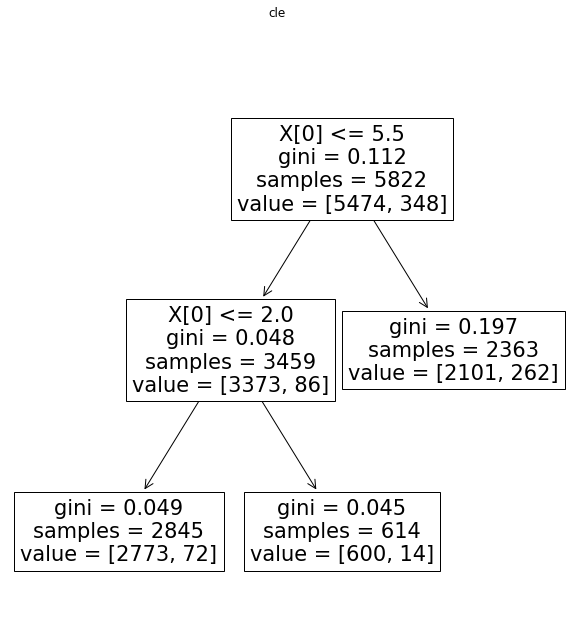

In [6]:
#mt_auto

print(X['mt_auto'].value_counts())

arbre_cla_mta=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mta.fit(X_new[:,0].reshape(X_new.shape[0],1),varexpliquee)
mt_at=np.repeat(-1,X_new.shape[0])
mt_at[X_new[:,0]<=2.0]=0
mt_at[(X_new[:,0]>2.0) & (X_new[:,0]<=5.5)]=1
mt_at[(X_new[:,0]>5.5)]=2

print(mt_at)

for i in range(0,5822):
    X['mt_auto'].iloc[i] = mt_at[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mta) 

print(X['mt_auto'].value_counts())

0    5789
1      31
2       2
Name: nb_bateau, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    5789
1      33
Name: nb_bateau, dtype: int64


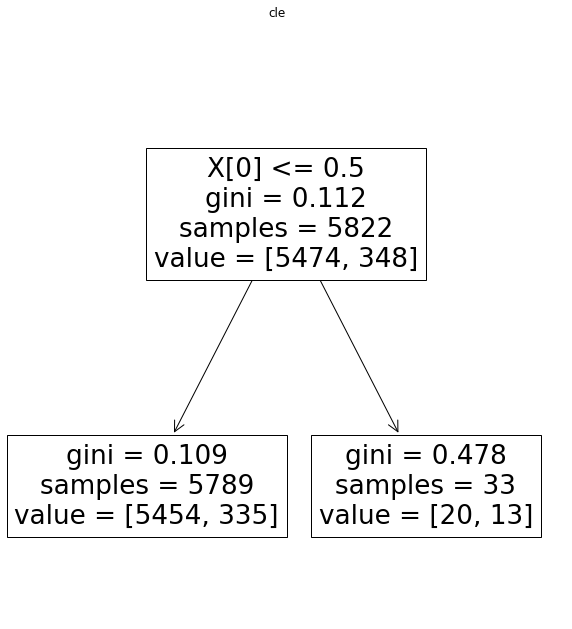

In [7]:
#nb_bateau

print(X['nb_bateau'].value_counts())

arbre_cla_nbb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_nbb.fit(X_new[:,1].reshape(X_new.shape[0],1),varexpliquee)
nb_b=np.repeat(-1,X_new.shape[0])
nb_b[X_new[:,1]<=0.5]=0
nb_b[(X_new[:,1]>0.5)] = 1

print(nb_b)

for i in range(0,5822):
    X['nb_bateau'].iloc[i] = nb_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_nbb) 

print(X['nb_bateau'].value_counts())

0    3482
2    2128
1     201
3      11
Name: mt_RC, dtype: int64
[0 2 2 ... 2 0 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0    3482
2    2139
1     201
Name: mt_RC, dtype: int64


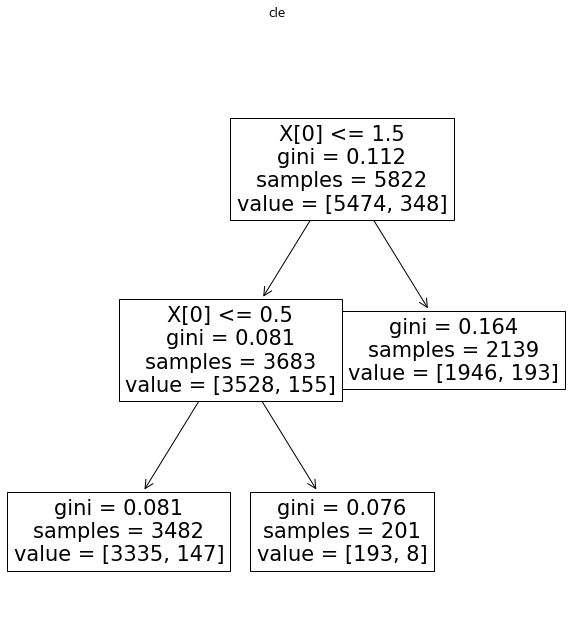

In [8]:
#mt_RC

print(X['mt_RC'].value_counts())

arbre_cla_mtrc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtrc.fit(X_new[:,2].reshape(X_new.shape[0],1),varexpliquee)
mt_rc=np.repeat(-1,X_new.shape[0])
mt_rc[X_new[:,2]<=0.5]=0
mt_rc[(X_new[:,2]>0.5) & (X_new[:,2]<=1.5)]=1
mt_rc[(X_new[:,2]>1.5)]=2

print(mt_rc)

for i in range(0,5822):
    X['mt_RC'].iloc[i] = mt_rc[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtrc) 

print(X['mt_RC'].value_counts())

0    2666
4    1226
3     920
2     535
1     161
6     155
5     149
7       9
8       1
Name: mt_incendie, dtype: int64
[3 1 1 ... 2 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0    2666
2    2146
1     696
3     314
Name: mt_incendie, dtype: int64


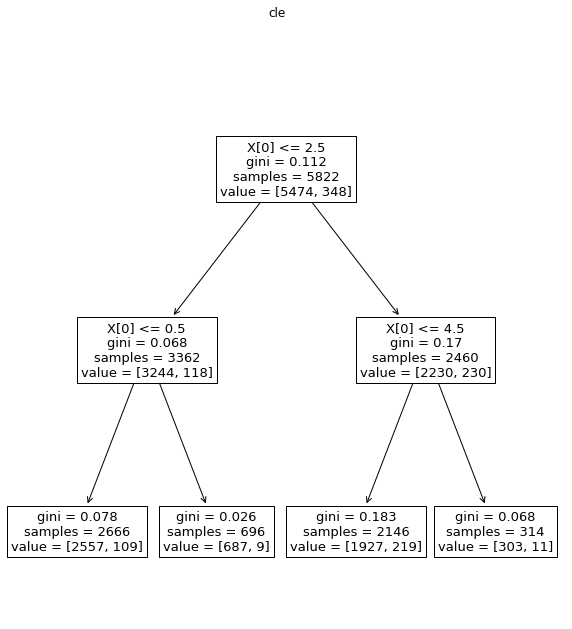

In [9]:
#mt_incendie

print(X['mt_incendie'].value_counts())

arbre_cla_mtinc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtinc.fit(X_new[:,4].reshape(X_new.shape[0],1),varexpliquee)
mt_in=np.repeat(-1,X_new.shape[0])
mt_in[X_new[:,4]<=0.5]=0
mt_in[(X_new[:,4]>0.5) & (X_new[:,4]<=2.5)]=1
mt_in[(X_new[:,4]>2.5) & (X_new[:,4]<=4.5)]=2
mt_in[(X_new[:,4]>4.5)]=3

print(mt_in)

for i in range(0,5822):
    X['mt_incendie'].iloc[i] = mt_in[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtinc) 

print(X['mt_incendie'].value_counts())

0    5789
4      13
3       5
2       5
1       5
6       3
5       2
Name: mt_bateau, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    5789
1      33
Name: mt_bateau, dtype: int64


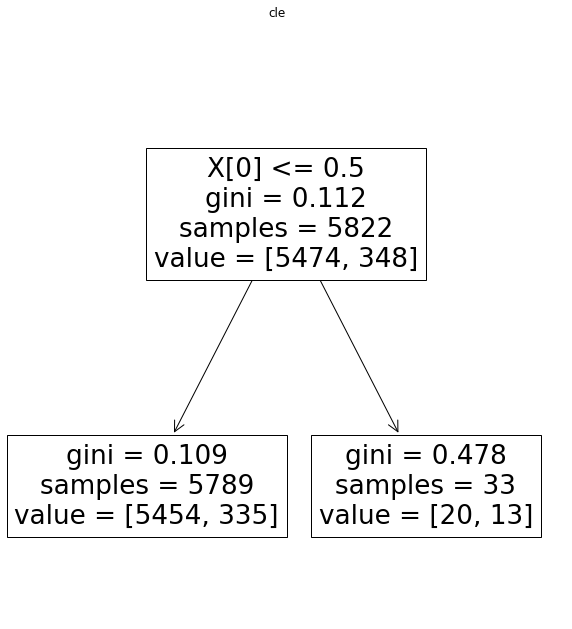

In [10]:
#mt_bateau

print(X['mt_bateau'].value_counts())

arbre_cla_mtb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_mtb.fit(X_new[:,5].reshape(X_new.shape[0],1),varexpliquee)
mt_b=np.repeat(-1,X_new.shape[0])
mt_b[X_new[:,5]<=0.5]=0
mt_b[(X_new[:,5]>0.5)]=1

print(mt_b)

for i in range(0,5822):
    X['mt_bateau'].iloc[i] = mt_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtb) 

print(X['mt_bateau'].value_counts())

3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: revenu_moyen, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


2    2942
1    1932
0     725
3     223
Name: revenu_moyen, dtype: int64


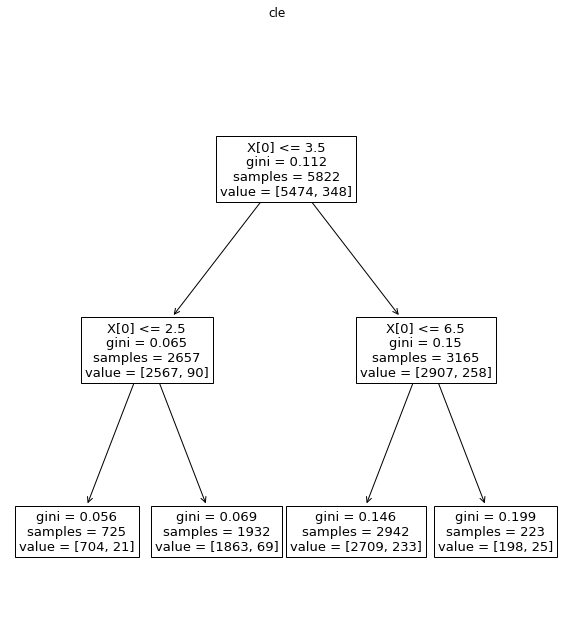

In [11]:
#revenu_moyen

print(X['revenu_moyen'].value_counts())

arbre_cla_rm=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_rm.fit(X_new[:,7].reshape(X_new.shape[0],1),varexpliquee)
rev_moy=np.repeat(-1,X_new.shape[0])
rev_moy[X_new[:,7]<=2.5]=0
rev_moy[(X_new[:,7]>2.5) & (X_new[:,7]<=3.5)]=1
rev_moy[(X_new[:,7]>3.5) & (X_new[:,7]<=6.5)]=2
rev_moy[(X_new[:,7]>6.5)]=3

print(mt_b)

for i in range(0,5822):
    X['revenu_moyen'].iloc[i] = rev_moy[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_rm) 

print(X['revenu_moyen'].value_counts())

0    2147
1    1322
2    1144
3     547
4     326
5     187
6      67
7      51
8      22
9       9
Name: niv_etude_haut, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


1    3013
0    2147
2     513
3     149
Name: niv_etude_haut, dtype: int64


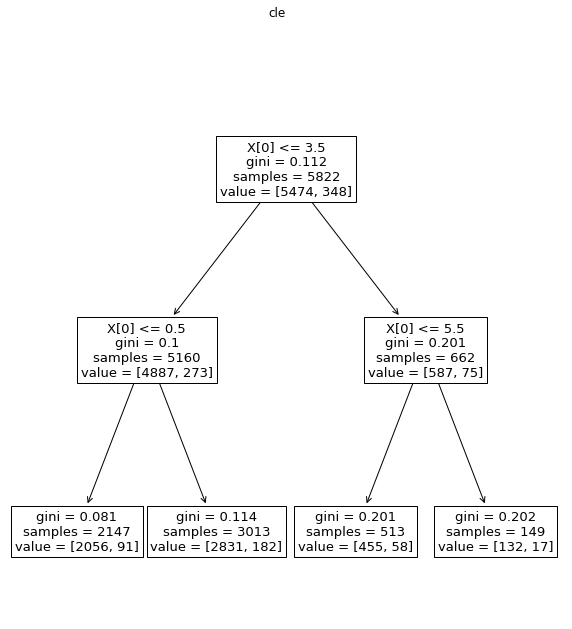

In [12]:
#niv_etude_haut

print(X['niv_etude_haut'].value_counts())

arbre_cla_neh=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_neh.fit(X_new[:,8].reshape(X_new.shape[0],1),varexpliquee)
neh=np.repeat(-1,X_new.shape[0])
neh[X_new[:,8]<=0.5]=0
neh[(X_new[:,8]>0.5) & (X_new[:,8]<=3.5)]=1
neh[(X_new[:,8]>3.5) & (X_new[:,8]<=5.5)]=2
neh[(X_new[:,8]>5.5)]=3

print(mt_b)

for i in range(0,5822):
    X['niv_etude_haut'].iloc[i] = neh[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_neh) 

print(X['niv_etude_haut'].value_counts())

0    1304
2    1094
3    1079
1     630
4     599
5     568
6     293
7     156
9      51
8      48
Name: revenu1, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


1    1724
3    1715
0    1304
2    1079
Name: revenu1, dtype: int64


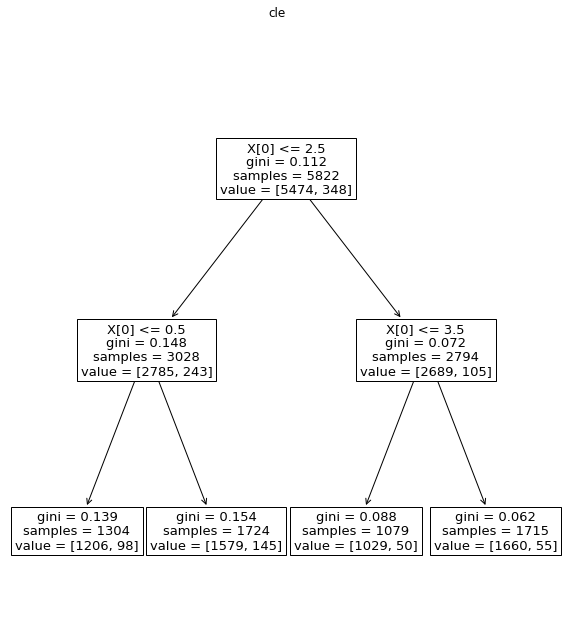

In [13]:
#revenu1

print(X['revenu1'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_r1.fit(X_new[:,9].reshape(X_new.shape[0],1),varexpliquee)
rev_1=np.repeat(-1,X_new.shape[0])
rev_1[X_new[:,9]<=0.5]=0
rev_1[(X_new[:,9]>0.5) & (X_new[:,9]<=2.5)]=1
rev_1[(X_new[:,9]>2.5) & (X_new[:,9]<=3.5)]=2
rev_1[(X_new[:,9]>3.5)]=3

print(mt_b)

for i in range(0,5822):
    X['revenu1'].iloc[i] = rev_1[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_r1) 

print(X['revenu1'].value_counts())

In [14]:
print(X)
print(B)

#Retraitement termine

      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           2          0      0              3            3          0   
1           0          0      2              4            1          0   
2           2          0      2              4            1          0   
3           2          0      0              4            1          0   
4           0          0      0              3            3          0   
...       ...        ...    ...            ...          ...        ...   
5817        2          0      2              3            2          0   
5818        0          0      0              5            3          0   
5819        2          0      2              3            2          0   
5820        2          0      0              6            0          0   
5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  
0                7             2               1   

[[2 0 0 ... 2 1 0]
 [0 0 2 ... 2 0 1]
 [2 0 2 ... 1 0 3]
 ...
 [2 0 2 ... 2 2 0]
 [0 0 1 ... 1 0 1]
 [2 0 2 ... 2 1 1]]
[0 0 0 ... 1 1 1]
(6081, 10)
(1521, 10)
(6081,)
(1521,)


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.7490544318368689


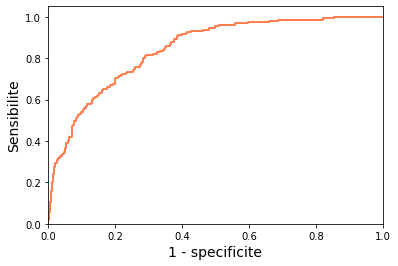

0.8429107445447315


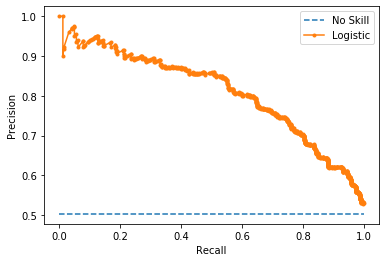

[[565 191]
 [203 562]]


precision
0.7463479415670651
rappel
0.734640522875817
score f1
0.7404479578392622




In [15]:
#Regression logistique

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_reglog, y_reglog = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_reglog, y_reglog = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_reglog, y_reglog = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_reglog, y_reglog = smote_enn.fit_resample(X, y)

print(X_reglog)
print(y_reglog)

#On fait la separation
#On separe a ce niveau pour que toutes les donnes meme x_test soit traite

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_reglog, y_reglog, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#Standardisation car Reg Log
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

#Preprocessing termine, la base est prete, elle est stocke dans X_train,X_test,Y_train,Y_test

#Regression Logistique

#model_rl = LogisticRegression(solver='liblinear', random_state=0)
#model_rl.fit(X_train_std,y_train)

#Construction d'une grille
parameters = {'penalty':['l1', 'l2'],'C':np.logspace(-10,1,10),'solver':['liblinear','saga']}

model = LogisticRegression()
grid_reg_log = model_selection.GridSearchCV(model,param_grid = parameters,scoring='accuracy')
model_rl = grid_reg_log.fit(X_train_std,y_train)
print(model_rl.best_params_)
print(model_rl.best_score_) #realise automatiquement par validation croisee

# Courbe Roc
y_pred_proba = model_rl.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
plt.show()

print(metrics.auc(fpr, tpr))


# precision-recall curve and f1
# predict probabilities
lr_probs = model_rl.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_rl.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Mesure de performance

#Prediciton
pred = model_rl.predict(X_test_std)
# matrice de confusion

print(confusion_matrix(y_test,pred))
print()
print()
#precision
print("precision")
print(precision_score(y_test,pred))
#rappel
print("rappel")
print(recall_score(y_test,pred))
#f1 score
print("score f1")
print(f1_score(y_test,pred))
print()
print()

In [16]:
#Arbre de decision

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_ad, y_ad = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_ad, y_ad = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_ad, y_ad = smote_tomek.fit_resample(X, y)

#Bon resultat
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_ad, y_ad = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_ad, y_ad, test_size=0.2)

# définition du modèle
tree= DecisionTreeClassifier(max_depth=9)
treeC=tree.fit(X_train, y_train)

# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

# Prévision de l'échantillon test
yChap = treeOpt.predict(X_test)
# matrice de confusion
print(confusion_matrix(y_test,yChap))

Meilleur score = 0.109521, Meilleur paramètre = {'max_depth': 9}
[[597 126]
 [ 40 758]]


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The optimal parameters are {'C': 10, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.87
0.921616448068061


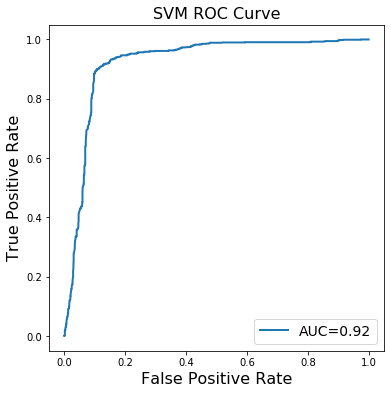

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [17]:
#SVM (5 minutes d execution)

#Over / Under sampling

#Bon Resultat 
from imblearn.over_sampling import SMOTE, ADASYN
X_svm, y_svm = SMOTE().fit_resample(X, y)

#Separation jeu entrainement, test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_svm, y_svm, test_size=0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# Pour svm, on doit standardiser les donnes

# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# definir les hyperp parametres 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid) 
  
# on test le modele optimal
grille = grid.fit(X_train_std, y_train) 

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grille.best_params_, grid.best_score_))

# prédire sur le jeu de test avec le modèle optimisé
y_pred = grille.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)
print(auc_cv)

# La courbe ROC
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='AUC=%.2f' % auc_cv)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

print(confusion_matrix(y_test, y_pred))

(6081, 10)
(1521, 10)
(6081,)
(1521,)
[[706  70]
 [393 352]]
0.6847557967439566


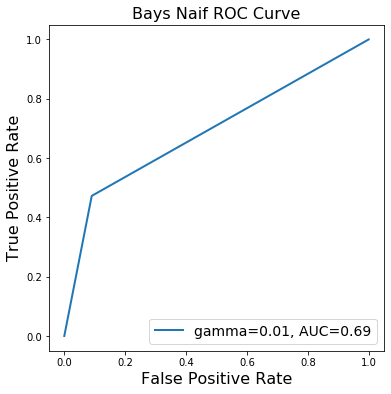

In [18]:
#Baysien naïf

#Over / Under sampling

#Resultat nul
#from imblearn.over_sampling import SMOTE, ADASYN
#X_bn, y_bn = SMOTE().fit_resample(X, y)

#Resultat catastrophique, cest de l aleatoire
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_bn, y_bn = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_bn, y_bn = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_bn, y_bn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_bn, y_bn, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)
gnb.score(X_train_std,y_train)

y_pred = gnb.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))

print(gnb.score(X_train_std,y_train))

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Bays Naif ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

Train on 4864 samples, validate on 1217 samples
Epoch 1/500
4864/4864 [==============================] - 1s 115us/sample - loss: 0.6139 - accuracy: 0.6682 - val_loss: 0.5756 - val_accuracy: 0.7132
Epoch 2/500
4864/4864 [==============================] - 0s 43us/sample - loss: 0.5601 - accuracy: 0.7103 - val_loss: 0.5442 - val_accuracy: 0.7280
Epoch 3/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.5363 - accuracy: 0.7200 - val_loss: 0.5253 - val_accuracy: 0.7305
Epoch 4/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.5201 - accuracy: 0.7218 - val_loss: 0.5138 - val_accuracy: 0.7346
Epoch 5/500
4864/4864 [==============================] - 0s 39us/sample - loss: 0.5113 - accuracy: 0.7286 - val_loss: 0.5061 - val_accuracy: 0.7288
Epoch 6/500
4864/4864 [==============================] - 0s 44us/sample - loss: 0.5051 - accuracy: 0.7317 - val_loss: 0.5102 - val_accuracy: 0.7502
Epoch 7/500
4864/4864 [==============================] - 0s 42u

Epoch 56/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.4577 - accuracy: 0.7810 - val_loss: 0.4495 - val_accuracy: 0.7938
Epoch 57/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.4567 - accuracy: 0.7806 - val_loss: 0.4511 - val_accuracy: 0.7905
Epoch 58/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.4564 - accuracy: 0.7841 - val_loss: 0.4454 - val_accuracy: 0.7970
Epoch 59/500
4864/4864 [==============================] - 0s 43us/sample - loss: 0.4553 - accuracy: 0.7788 - val_loss: 0.4452 - val_accuracy: 0.8028
Epoch 60/500
4864/4864 [==============================] - 0s 46us/sample - loss: 0.4545 - accuracy: 0.7850 - val_loss: 0.4442 - val_accuracy: 0.7888
Epoch 61/500
4864/4864 [==============================] - 0s 48us/sample - loss: 0.4543 - accuracy: 0.7862 - val_loss: 0.4458 - val_accuracy: 0.8012
Epoch 62/500
4864/4864 [==============================] - 0s 48us/sample - loss: 0.4533 - accuracy: 0.7833

4864/4864 [==============================] - 0s 37us/sample - loss: 0.3994 - accuracy: 0.8349 - val_loss: 0.3974 - val_accuracy: 0.8250
Epoch 165/500
4864/4864 [==============================] - 0s 43us/sample - loss: 0.4010 - accuracy: 0.8337 - val_loss: 0.3975 - val_accuracy: 0.8340
Epoch 166/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3993 - accuracy: 0.8363 - val_loss: 0.3933 - val_accuracy: 0.8389
Epoch 167/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.3998 - accuracy: 0.8384 - val_loss: 0.3945 - val_accuracy: 0.8283
Epoch 168/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.3982 - accuracy: 0.8322 - val_loss: 0.4020 - val_accuracy: 0.8135
Epoch 169/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.3994 - accuracy: 0.8359 - val_loss: 0.4022 - val_accuracy: 0.8283
Epoch 170/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3999 - accuracy: 0.8333 - val_

Epoch 219/500
4864/4864 [==============================] - 0s 39us/sample - loss: 0.3913 - accuracy: 0.8396 - val_loss: 0.3901 - val_accuracy: 0.8348
Epoch 220/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.3910 - accuracy: 0.8380 - val_loss: 0.3850 - val_accuracy: 0.8332
Epoch 221/500
4864/4864 [==============================] - 0s 45us/sample - loss: 0.3913 - accuracy: 0.8388 - val_loss: 0.3864 - val_accuracy: 0.8381
Epoch 222/500
4864/4864 [==============================] - 0s 48us/sample - loss: 0.3906 - accuracy: 0.8353 - val_loss: 0.3832 - val_accuracy: 0.8389
Epoch 223/500
4864/4864 [==============================] - 0s 45us/sample - loss: 0.3872 - accuracy: 0.8421 - val_loss: 0.3870 - val_accuracy: 0.8365
Epoch 224/500
4864/4864 [==============================] - 0s 51us/sample - loss: 0.3871 - accuracy: 0.8380 - val_loss: 0.3848 - val_accuracy: 0.8307
Epoch 225/500
4864/4864 [==============================] - 0s 45us/sample - loss: 0.3893 - accuracy:

Epoch 328/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3765 - accuracy: 0.8417 - val_loss: 0.3757 - val_accuracy: 0.8365
Epoch 329/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3764 - accuracy: 0.8435 - val_loss: 0.3715 - val_accuracy: 0.8455
Epoch 330/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.3769 - accuracy: 0.8419 - val_loss: 0.3687 - val_accuracy: 0.8414
Epoch 331/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.3751 - accuracy: 0.8466 - val_loss: 0.3783 - val_accuracy: 0.8373
Epoch 332/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.3773 - accuracy: 0.8466 - val_loss: 0.3700 - val_accuracy: 0.8365
Epoch 333/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3745 - accuracy: 0.8433 - val_loss: 0.3697 - val_accuracy: 0.8422
Epoch 334/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.3751 - accuracy:

Epoch 437/500
4864/4864 [==============================] - 0s 48us/sample - loss: 0.3687 - accuracy: 0.8454 - val_loss: 0.3713 - val_accuracy: 0.8365
Epoch 438/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.3680 - accuracy: 0.8470 - val_loss: 0.3625 - val_accuracy: 0.8414
Epoch 439/500
4864/4864 [==============================] - 0s 44us/sample - loss: 0.3695 - accuracy: 0.8472 - val_loss: 0.3615 - val_accuracy: 0.8414
Epoch 440/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3688 - accuracy: 0.8475 - val_loss: 0.3627 - val_accuracy: 0.8472
Epoch 441/500
4864/4864 [==============================] - 0s 48us/sample - loss: 0.3676 - accuracy: 0.8487 - val_loss: 0.3631 - val_accuracy: 0.8521
Epoch 442/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.3692 - accuracy: 0.8485 - val_loss: 0.3601 - val_accuracy: 0.8422
Epoch 443/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.3716 - accuracy:

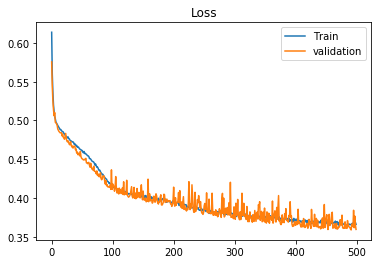

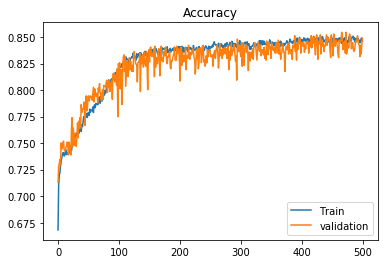

1521/1521 [==============================] - 0s 88us/sample - loss: 6.7113 - accuracy: 0.4629
(1521,)
(1521,)
[[695  34]
 [783   9]]


In [19]:
#Reseau de neurone

import tensorflow as tf

# Utilisation du package tensorflow a installer

#print(X)
#print(y)

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_rn, y_rn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_rn, y_rn, test_size=0.2,random_state = 1)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(5, activation = "relu"))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

history= model.fit(X_train, y_train, epochs = 500,validation_split = 0.2)

model.summary()

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label = "Train")
plt.plot(loss_val_curve, label="validation")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(acc_curve, label = "Train")
plt.plot(acc_val_curve, label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()

model.evaluate(X_test_std,y_test)

y_pred = model.predict(X_test_std)

L = []
for i in range(1521):
    if y_pred[i][0] > y_pred[i][1]:
        L.append(0)
    else:
        L.append(1)

print(y_test.shape)
y_pred_fin = np.array(L)
print(y_pred_fin.shape)
print(confusion_matrix(y_test, y_pred_fin))